In [1]:
# importing liabraries
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# impoting data
data=pd.read_csv(r"C:\Users\priya\Downloads\Electric_Production.csv")

In [3]:
# make copy of data
df=data

In [4]:
# first five rows of dataset
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
# shape of dataframe
df.shape

(397, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
# changing column name and dropping extra column from dataframe
df["Production"]=df["IPG2211A2N"]
df = df.drop(columns=["IPG2211A2N"])

In [8]:
# checking null values from dataframe
df.isna().sum()

DATE          0
Production    0
dtype: int64

In [9]:
# using reset index method for reset the index back to default indexes
df.reset_index(drop=True,inplace=True)

In [10]:
df.head()

,DATE,Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [11]:
# setting date column as index
#df.index = pd.to_datetime(df['DATE'])

In [12]:
# dropping date column from dataframe
#df = df.drop(columns=['DATE'])

In [13]:
# making new dataframe
df=df[["DATE","Production"]]

In [14]:
# making dataframe column as ds and y which is default column names for prophet
df.columns=["ds","y"]

In [15]:
df.head()

,ds,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


<Axes: xlabel='ds'>

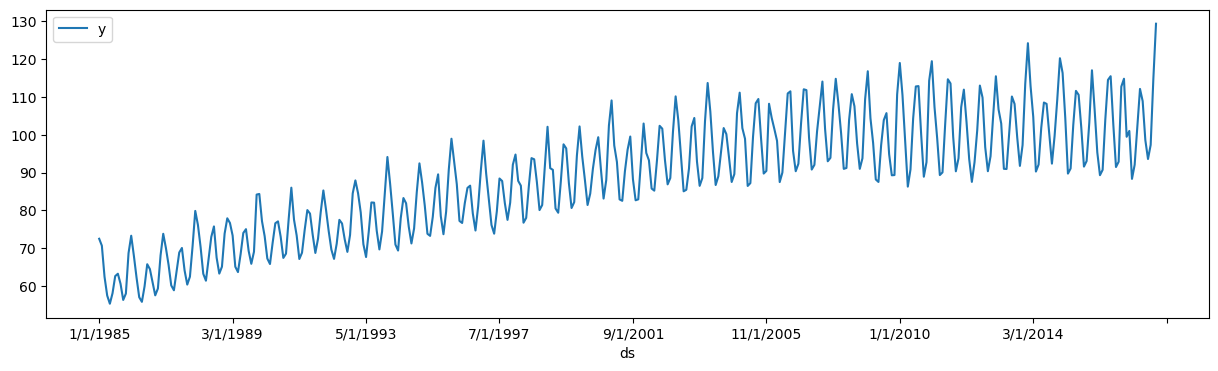

In [16]:
# making plot from dataframe to know the trend of data
df.plot(x="ds",y="y",figsize=(15,4))

In [17]:
# the graph shows electric production from 1989 to 2014
# the data has upword trend
# the electric production rising steadily over the period
# data shows there is highest electic production in 2014

In [18]:
# checking shape of the data frame
df.shape

(397, 2)

In [19]:
# splitting data into train test
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size, :], df.iloc[train_size:, :]

In [20]:
# creating model
model=Prophet()

In [21]:
# fitting the model on training data
model.fit(train_data)

11:44:35 - cmdstanpy - INFO - Chain [1] start processing
11:44:35 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# making future dataframe
future = model.make_future_dataframe(periods=len(test_data), freq='M')

In [32]:
# predicting the future dataframe
forecast = model.predict(future)

In [33]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
392,2017-08-31,106.224819,99.913402,106.735098,105.360300,107.325349,-3.131127,-3.131127,-3.131127,-3.131127,-3.131127,-3.131127,0.0,0.0,0.0,103.093691
393,2017-09-30,106.269821,93.656304,100.484607,105.383187,107.381180,-9.351284,-9.351284,-9.351284,-9.351284,-9.351284,-9.351284,0.0,0.0,0.0,96.918537
394,2017-10-31,106.316324,95.917811,102.606041,105.395466,107.450150,-7.290174,-7.290174,-7.290174,-7.290174,-7.290174,-7.290174,0.0,0.0,0.0,99.026150
395,2017-11-30,106.361327,106.105045,113.151191,105.421336,107.510778,3.232434,3.232434,3.232434,3.232434,3.232434,3.232434,0.0,0.0,0.0,109.593760
396,2017-12-31,106.407829,117.094631,123.956367,105.458223,107.594002,14.097396,14.097396,14.097396,14.097396,14.097396,14.097396,0.0,0.0,0.0,120.505225


In [34]:
# plotting future trend of the data
plot_components_plotly(model,forecast)

In [35]:
# making prediction on test data
pred=forecast[-len(test_data):]["yhat"]

In [36]:
# checking shape of prediction
pred.shape

(80,)

In [37]:
from statsmodels.tools.eval_measures import rmse

In [38]:
rmse(pred,test_data["y"])

4.228699944069201

In [39]:
test_data["y"].mean()

102.71854125

In [ ]:
# summary
# Time Series analysis project on electric production utilized the Prophet model,
# resulting in a 4.2286 RMSE score. The dataset exhibited an upward trend, and the
# model is effective in capturing and forcasting the electric production patterns.